<a href="https://colab.research.google.com/github/AlcoholWolf/py-play/blob/main/ch02_03_%EB%A7%89%EB%8C%80%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.03. 막대그래프

---
* 날짜:
* 이름:

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')



## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### **| 기본사용**

```
xs = ['Jan', 'Fab', 'Mar', 'Apr', 'May', 'Jun']
nums = [35, 40, 35, 40, 55, 45]
plt.bar(xs, nums)
plt.show()
```

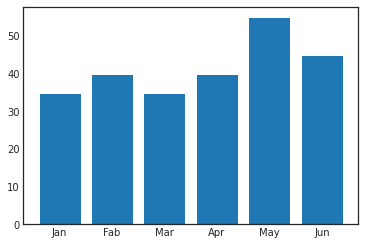

In [2]:
xs = ['Jan', 'Fab', 'Mar', 'Apr', 'May', 'Jun']
nums = [35, 40, 35, 40, 55, 45]
plt.bar(xs, nums)
plt.show()

#### **| 옵션**

```
plt.bar(xs, nums, 
        color = '색깔'
        edgecolor='테두리색'
        width/ height=바의 너비/높이
        linewidth=테두리두께
        align=눈금위치('center'/'edge'), 
        tick_label=[])
```

<BarContainer object of 6 artists>

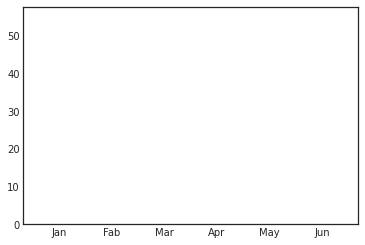

In [4]:
plt.bar(xs, nums, 
        color = '#FFFFFF')

#### **| 수평 막대그래프**


```
plt.barh(xs, nums)
```

<BarContainer object of 6 artists>

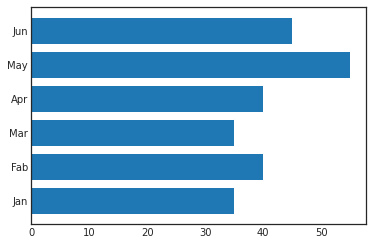

In [5]:
plt.barh(xs, nums)

### (2) Seaborn 으로 그리기




#### **| 기본사용**

```
sns.barplot(x=xs, y=nums)
```

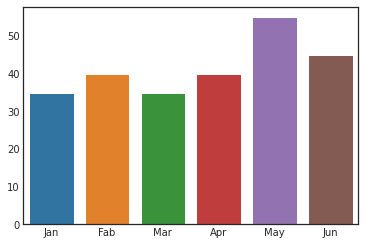

In [6]:
sns.barplot(x=xs, y=nums)

#### **| 옵션**

```
seaborn.barplot(x=None, y=None, 
                color=None, 
                palette=None, # 컬러맵
                saturation=0.75, # 밝기
                )
```

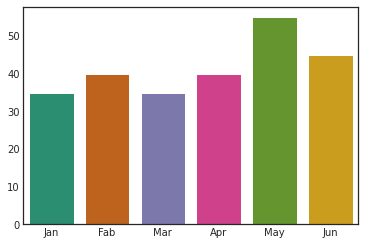

In [57]:
sns.barplot(x=xs, y=nums,
                palette='Dark2', # 컬러맵
                saturation=0.75, # 밝기
                )

#### **| 수평 막대그래프**


```
sns.barplot(x=nums, y=xs)
```

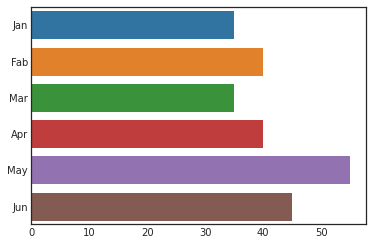

In [17]:
sns.barplot(x=nums, y=xs)

#### **| DataFrame 사용**



* 데이터 프레임을 만들어 줍니다.



In [60]:
df = pd.DataFrame([xs, nums]).T
df.columns=['Mun','count']
df

,Mun,count
0,Jan,35
1,Fab,40
2,Mar,35
3,Apr,40
4,May,55
5,Jun,45


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot.bar(x=x,y=y)
```




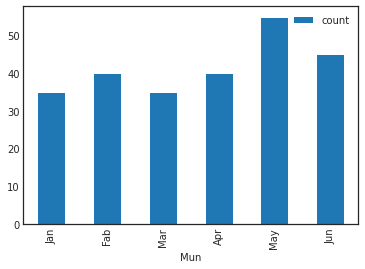

In [61]:
df.plot.bar(x='Mun',y='count')

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.barplot(data=df,x=x, y=y)
```


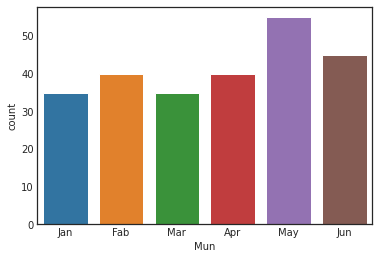

In [62]:
sns.barplot(data=df,x='Mun',y='count')


## **실습**


---




### (1) 과일 데이터 시각화


```
np.random.seed(42)
fruits=['apple', 'banana','orange']
fresh = np.random.randint(1,10,3)
qual = np.random.randint(1,10,3)
price = np.random.randint(1000,1500,3)
sale = np.random.randint(700,1200,3)
```

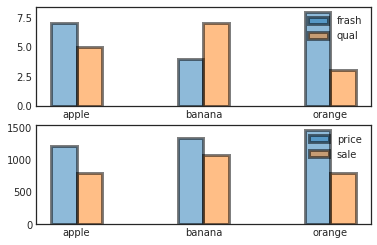

In [107]:
np.random.seed(42)
fruits=['apple', 'banana','orange']
fresh = np.random.randint(1,10,3)
qual = np.random.randint(1,10,3)
price = np.random.randint(1000,1500,3)
sale = np.random.randint(700,1200,3)

idx = np.arange(3)
# width = 0.2

plt.subplot(2, 1, 1)
style = dict(width = 0.2, 
             alpha = 0.5, 
             linewidth = 3, 
             edgecolor = 'k')

plt.bar(idx, fresh, label = "frash", **style)

plt.bar(idx+width, qual, label = "qual", **style)

# plt.bar(idx+width*2, price, label = "price", **style)

# plt.bar(idx+width*3, sale, label = "sale", **style)

plt.xticks(idx+(width/2), fruits)
plt.legend()


plt.subplot(2, 1, 2)

plt.bar(idx, price, label = "price", **style)
plt.bar(idx+width, sale, label = "sale", **style)
plt.xticks(idx+(width/2), fruits)
plt.legend()

### (2) **kwargs 이용한 옵션적용




<BarContainer object of 3 artists>

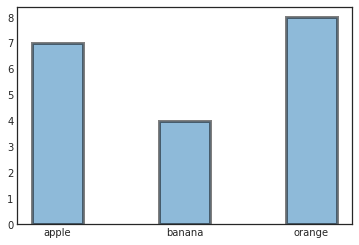

In [99]:
plt.bar(fruits, fresh, **style)


## 과제


### (1) 막대그래프를 이용한 flight 데이터 시각화

```
df=sns.load_dataset('flights')
```

 `seaborn`의 `load_dataset`을 이용해 `flights` 데이터를 불러온 후 아래와 같은 플롯을 그리세요.

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0203-01.png?raw=true)





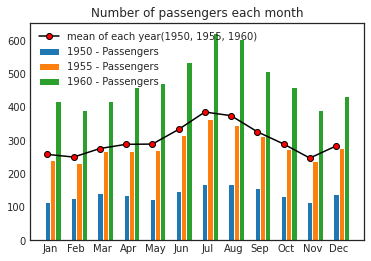

In [174]:
df=sns.load_dataset('flights')

df1 = df[df.year == 1950]
df2 = df[df.year == 1955]
df3 = df[df.year == 1960]

mean = np.mean(np.array([df1.passengers, df2.passengers, df3.passengers]), axis=0)

idx = np.arange(12)

width = 0.2
style = dict(width = width)

plt.bar(idx, df1.passengers, label = "1950 - Passengers", **style)
plt.bar(idx+width, df2.passengers, label = "1955 - Passengers", **style)
plt.bar(idx+width*2, df3.passengers, label = "1960 - Passengers", **style)
plt.plot(mean, marker='o', color='k', markerfacecolor='r', label='mean of each year(1950, 1955, 1960)')

plt.xticks(idx+(width/2), df.month)
plt.legend(loc='upper left')
plt.title('Number of passengers each month')

plt.show()